In [2]:
%reset
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm
import pandas as pd
%matplotlib notebook
from scipy.interpolate import splrep, splev
from ipywidgets import *
from IPython.display import display

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<IPython.core.display.Javascript object>


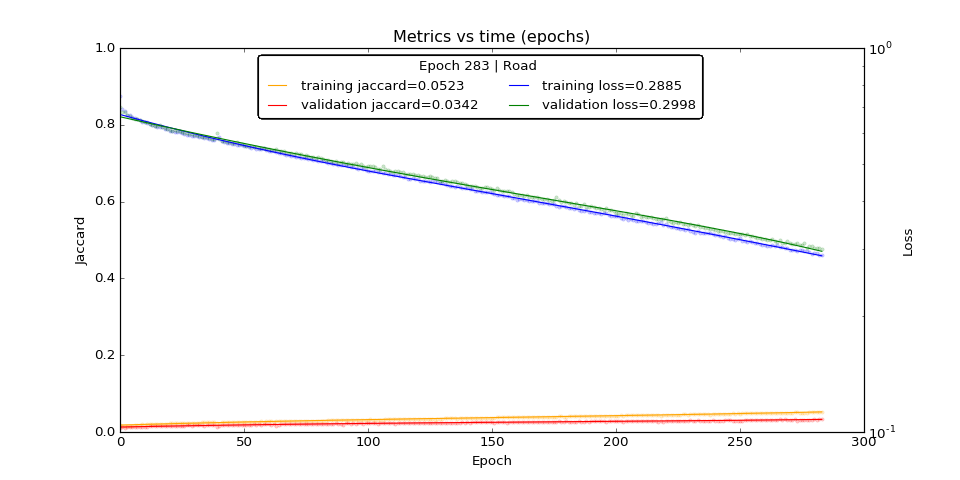

In [3]:
# displaying the text widget
run = widgets.Text(description="Run #", value=str(np.load('./data/misc/run_counter.npy')), width=200)
class_ = widgets.Text(description="Class", value='0', width=200)
class_dict = {0:'Buildings',1:'Misc structures ',2:'Road ',3:'Tracks',4:'Trees',5:'Crops',6:'Waterways ',7:'Standing water',8:'Vehicle large',9:'Vehicle small'}
#display(run)
button = widgets.Button(description="Update the graph")
#display(button)

widgets_ = HBox([run,class_,button])
display(widgets_)

#data = pd.read_csv('./data/training_log_run_' + str(run.value))
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Jaccard')
ax2.set_ylabel('Loss')
ax1.set_title('Metrics vs time (epochs)')
ax1.set_ylim([0,1])

def plotter(data):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 1e-2) #1e-2
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    if ax1 or ax2:
        ax1.clear()
        ax2.clear()
        
    # Jaccard       
    ax1.plot(data['epoch'],data['jaccard'], ".",color='orange',label='_nolegend_',alpha=0.2)
    ax1.plot(data['epoch'],data['val_jaccard'], ".",color='red',label='_nolegend_',alpha=0.2)
    
    
    x,y = smoothen('jaccard')
    jaccard, = ax1.plot(x,y,'-',color='orange',label="training jaccard = %04f" %data['jaccard'].iloc[-1])
    x,y = smoothen('val_jaccard')
    val_jaccard, = ax1.plot(x,y,'-',color='red',label="validation jaccard=%04f" %data['val_jaccard'].iloc[-1])
    ax1.set_ylabel('Jaccard')
    ax1.set_xlabel('Epoch')
    #ax1.legend()
    
    # Loss    
    ax2.plot(data['epoch'],data['loss'], ".",color='blue',label='_nolegend_',alpha=0.2)
    ax2.plot(data['epoch'],data['val_loss'], ".",color='green',label='_nolegend_',alpha=0.2)
    
    x,y = smoothen('loss')
    loss, = ax2.plot(x,y,'-',color='blue',label="training loss=%04f" %data['loss'].iloc[-1])
    x,y = smoothen('val_loss')
    val_loss, = ax2.plot(x,y,'-',color='green',label="validation loss=%04f" %data['val_loss'].iloc[-1])
    ax2.set_ylabel('Loss')
    ax2.set_yscale('log')
    #ax2.legend()
    
    ax1.set_ylim([0,1])
    xlim = 100
    while xlim - data['epoch'].iloc[-1]<10:
        xlim += 25
    ax1.set_xlim([0,xlim])
    plt.figlegend((jaccard,val_jaccard,loss,val_loss),
                  ("training jaccard={:0.4f}".format(data['jaccard'].iloc[-1]),
                   "validation jaccard={:0.4f}".format(data['val_jaccard'].iloc[-1]),
                   "training loss={:0.4f}".format(data['loss'].iloc[-1]),
                  "validation loss={:0.4f}".format(data['val_loss'].iloc[-1])),
                  loc='upper center',ncol=2,fancybox=True, shadow=False,
                  title='Epoch {} | {}'.format(data['epoch'].iloc[-1],class_dict[int(class_.value)]),fontsize='medium',bbox_to_anchor=(0.5, .9))
    ax1.set_title('Metrics vs time (epochs)')
    plt.draw()

#plt.ion()
plt.show()

def on_button_clicked(b):
    data = pd.read_csv('./data/logs/training_log_run_{}_class_{}'.format(run.value,class_.value))
    plotter(data)
    #fig.legend('','')
    #plt.draw()
def handle_submit(run):
    print(run.value)
    #plot_classifier(run.value)
    
button.on_click(on_button_clicked)
run.on_submit(handle_submit)

<IPython.core.display.Javascript object>


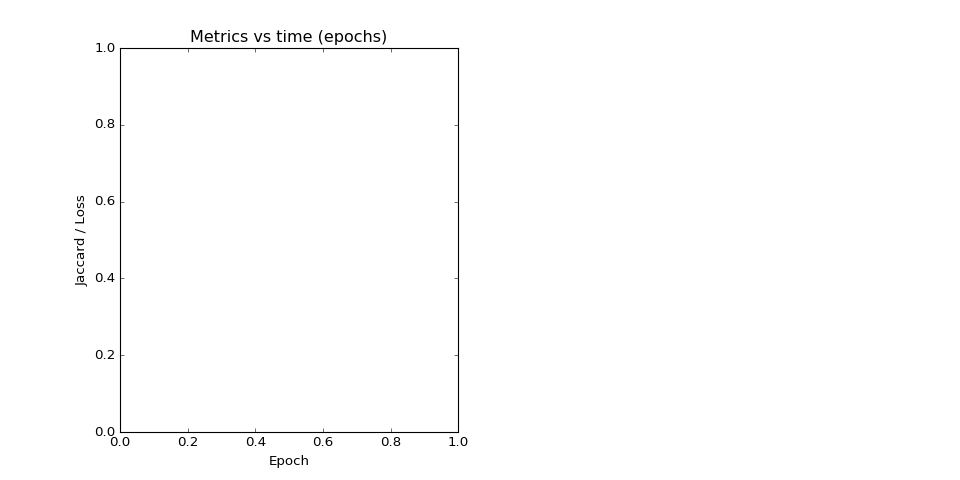

In [3]:
# displaying the text widget
run = widgets.Text(description="Run #", value=str(np.load('./data/misc/run_counter.npy')), width=200)
#display(run)
button = widgets.Button(description="Update the graph")
#display(button)

widgets_ = HBox([run,button])
display(widgets_)

#data = pd.read_csv('./data/training_log_run_' + str(run.value))
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
ax.set_xlabel('Epoch')
ax.set_ylabel('Jaccard / Loss')
ax.set_title('Metrics vs time (epochs)')
ax.set_ylim([0,1])

def plotter(data):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 1e-2) #1e-2
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    if ax:
        ax.clear()
    # Training data
    data_columns = data.columns[1:]
    # Note: data.iloc[:,[1,12,13,24]].columns gives just jaccard/loss for training & validation
    plt.tight_layout()
    cmap = matplotlib.cm.get_cmap('gist_rainbow')
    colors = list(cmap(np.linspace(0,1,len(data_columns)/2)))
    colors = colors*2
    for i,column in enumerate(data_columns):
        ax.plot(data['epoch'],data[column], ".",color=colors[i],label='_nolegend_',alpha=0.2)
        x,y = smoothen(column)
        ax.plot(x,y,'-',color=colors[i],label="%s=%.4f" %(column,data[column].iloc[-1]))
    ax.legend(loc="upper left", bbox_to_anchor=(1,1),
          ncol=2, fancybox=True, shadow=False,title='Epoch %i' %data['epoch'].iloc[-1],fontsize='small')
    # loc='upper center', bbox_to_anchor=(0.5, 1.05),
    ax.set_ylim([0,1])
    xlim = 100
    while xlim - data['epoch'].iloc[-1]<20:
        xlim += 20
    ax.set_xlim([0,xlim])
    
    plt.draw()

#plt.ion()
plt.show()

def on_button_clicked(b):
    data = pd.read_csv('./data/logs/training_log_run_' + str(run.value))
    plotter(data)
    #fig.legend('','')
    #plt.draw()
def handle_submit(run):
    print(run.value)
    #plot_classifier(run.value)
    
button.on_click(on_button_clicked)
run.on_submit(handle_submit)

In [4]:
# displaying the text widget
run = widgets.Text(description="Run #", value=str(np.load('./data/misc/run_counter.npy')), width=200)
#display(run)
button = widgets.Button(description="Update the graph")
#display(button)

widgets_ = HBox([run,button])
display(widgets_)

#data = pd.read_csv('./data/training_log_run_' + str(run.value))
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
ax.set_xlabel('Epoch')
ax.set_ylabel('Jaccard / Loss')
ax.set_title('Metrics vs time (epochs)')
ax.set_ylim([0,1])

def plotter(data):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 1e-2) #1e-2
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    if ax:
        ax.clear()
    # Training data
    
    cmap = matplotlib.cm.get_cmap('gist_rainbow')
    colors = list(cmap(np.linspace(0,1,(len(data.columns)-1)/2))
    print((len(data.columns)-1)/2)
    for i,column in enumerate(data):
        if column != 'epoch':
            ax.plot(data['epoch'],data[column], ".",color=colors[i],label='_nolegend_',alpha=0.2)
            x,y = smoothen(column)
            ax.plot(x,y,'-',color=colors[i],label="%s=%04f" %(column,data[column].iloc[-1]))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=False,title='Epoch %i' %data['epoch'].iloc[-1],fontsize='medium')
    ax.set_ylim([0,1])
    xlim = 250
    while xlim - data['epoch'].iloc[-1]<50:
        xlim += 50
    ax.set_xlim([0,xlim])
    plt.draw()

#plt.ion()
plt.show()

def on_button_clicked(b):
    data = pd.read_csv('./data/logs/training_log_run_' + str(run.value))
    plotter(data)
    #fig.legend('','')
    #plt.draw()
def handle_submit(run):
    print(run.value)
    #plot_classifier(run.value)
    
button.on_click(on_button_clicked)
run.on_submit(handle_submit)

SyntaxError: invalid syntax (<ipython-input-4-5391377da26d>, line 32)

In [8]:
plt.subplots?

In [7]:
pd.read_csv('./data/training_log_run_91').tail()

,epoch,jaccard,loss,val_jaccard,val_loss
281,281,0.540758,0.079552,0.560791,0.086399
282,282,0.540585,0.078984,0.565990,0.086023
283,283,0.543665,0.079173,0.557232,0.086637
284,284,0.552095,0.078396,0.558584,0.086289
285,285,0.556131,0.078208,0.568859,0.086171


In [236]:
def plot_classifier(run):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 9e-3)
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    data = pd.read_csv('./data/training_log_run_' + str(run))
    
    fig = plt.figure(figsize=(12, 12))

    ax = fig.add_subplot(211)
    ax.plot(data['epoch'],data['loss'], ".",color='blue',label='_nolegend_',alpha=0.5)
    ax.plot(data['epoch'],data['jaccard'], ".",color='orange',label='_nolegend_',alpha=0.5)
    x,y = smoothen('loss')
    ax.plot(x,y,'-',color='blue',label="Training loss epoch %i: %04f" %(data['epoch'].iloc[-1],data['loss'].iloc[-1]))
    x,y = smoothen('jaccard')
    ax.plot(x,y,'-',color='orange',label="Training jaccard epoch %i: %04f" %(data['epoch'].iloc[-1],data['jaccard'].iloc[-1]))
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Jaccard / Loss')
    plt.legend(loc='best')
    ax.set_title('Metrics vs time (epochs)')
    
    ax = fig.add_subplot(212)
    ax.plot(data['epoch'],data['val_loss'], ".",color='green',label='_nolegend_',alpha=0.5)
    ax.plot(data['epoch'],data['val_jaccard'], ".",color='red',label='_nolegend_',alpha=0.5)
    x,y = smoothen('val_loss')
    ax.plot(x,y,'-',color='green',label="Validation loss epoch %i: %04f" %(data['epoch'].iloc[-1],data['val_loss'].iloc[-1]))
    x,y = smoothen('val_jaccard')
    ax.plot(x,y,'-',color='red',label="Validation loss epoch %i: %04f" %(data['epoch'].iloc[-1],data['val_jaccard'].iloc[-1]))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Jaccard / Loss')
    plt.legend(loc='best')
    #ax.set_title('Metrics vs time (epochs)')    
    
    plt.draw()
    #return fig

In [4]:
np.load('./data/misc/weights.npy')

array([  0.32274322,   0.54275441,   2.00129976,   0.91864449,
         0.27469956,   0.12830399,   1.09716538,   8.49943404,
        83.32187547,  11.80398919])